In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [11]:
import numpy as np
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, GlobalAveragePooling1D, Embedding, Conv1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [12]:
tokenizer = Tokenizer()

data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [13]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[: i+1]
    input_sequences.append(n_gram_sequence)

In [14]:
max_sequence_len = max([len(x) for x in input_sequences])

In [15]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len,padding = 'pre'))

In [19]:
xs = input_sequences[:,:-1]
labels = input_sequences[:, -1]

In [20]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


In [21]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [33]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(LSTM(20))
model.add(Dense(total_words, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [34]:
history = model.fit(xs, ys, epochs = 500, verbose = 1)

Epoch 1/500
15/15 [==============================] - 0s 4ms/step - loss: 5.5706 - accuracy: 0.0265
Epoch 2/500
15/15 [==============================] - 0s 4ms/step - loss: 5.5537 - accuracy: 0.0419
Epoch 3/500
15/15 [==============================] - 0s 4ms/step - loss: 5.5182 - accuracy: 0.0375
Epoch 4/500
15/15 [==============================] - 0s 4ms/step - loss: 5.4141 - accuracy: 0.0464
Epoch 5/500
15/15 [==============================] - 0s 4ms/step - loss: 5.2821 - accuracy: 0.0530
Epoch 6/500
15/15 [==============================] - 0s 4ms/step - loss: 5.1806 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 4ms/step - loss: 5.1149 - accuracy: 0.0486
Epoch 8/500
15/15 [==============================] - 0s 4ms/step - loss: 5.0773 - accuracy: 0.0596
Epoch 9/500
15/15 [==============================] - 0s 4ms/step - loss: 5.0476 - accuracy: 0.0640
Epoch 10/500
15/15 [==============================] - 0s 4ms/step - loss: 5.0223 - accuracy: 0.0618
Epoch 11/

In [35]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

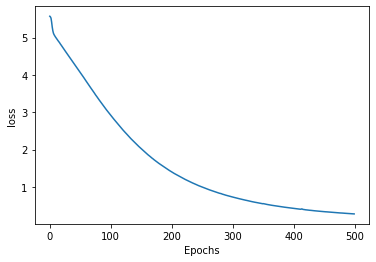

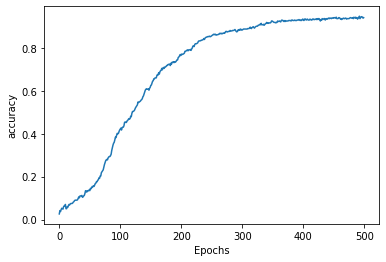

In [36]:
plot_graphs(history, 'loss')
plot_graphs(history, 'accuracy')

In [37]:
seed_text = "Laurence went to Dublin"
next_words = 100
for _ in range(100):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding='pre')
  predicted = model.predict_classes(token_list, verbose = 0)
  output_word = " "
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

Laurence went to Dublin learn nothing at all round the town ogradys of lanigan jeremy lanigan together together wine reel at a reel and wine for a reel a whirligig again again friends bellows a call friends and able a whirligig friends a jig them a rose jig glisten glisten ground learn steps me them much a man again give her and a rose friends relations ladies relations dublin relations new new academy a whirligig glisten glisten creature pipes drop too much then then then then were runctions were runctions runctions twas runctions glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten


## Laurences Poetry

In [41]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2020-07-04 20:58:25--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.208, 172.217.7.240, 172.217.8.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0s      

2020-07-04 20:58:25 (139 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [42]:
data = open('/tmp/irish-lyrics-eof.txt').read()
corpus = data.lower().split("\n")

In [45]:
def preprocessing(corpus):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  total_words = len(tokenizer.word_index) + 1

  input_sequences = []

  for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
      n_gram_sequence = token_list[:i+1]
      input_sequences.append(n_gram_sequence)

  max_sequence_len = max([len(x) for x in input_sequences])
  input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding = 'pre'))

  xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

  ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

  return (xs, ys),(total_words, max_sequence_len)

In [46]:
(xs, ys), (total_words, max_sequence_len) = preprocessing(corpus)

In [57]:
model2 = Sequential()
model2.add(Embedding(total_words, 100, input_length = max_sequence_len-1))
model2.add(Bidirectional(LSTM(150)))
model2.add(Dense(total_words, activation = 'softmax'))

adam = Adam(lr = 0.01)

model2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [58]:
history2 = model2.fit(xs, ys, epochs = 100, verbose = 1)

Epoch 1/100
377/377 [==============================] - 3s 9ms/step - loss: 6.6425 - accuracy: 0.0749
Epoch 2/100
377/377 [==============================] - 3s 9ms/step - loss: 5.7549 - accuracy: 0.1126
Epoch 3/100
377/377 [==============================] - 3s 9ms/step - loss: 4.8978 - accuracy: 0.1621
Epoch 4/100
377/377 [==============================] - 3s 9ms/step - loss: 3.9696 - accuracy: 0.2351
Epoch 5/100
377/377 [==============================] - 3s 9ms/step - loss: 3.1207 - accuracy: 0.3447
Epoch 6/100
377/377 [==============================] - 3s 9ms/step - loss: 2.4374 - accuracy: 0.4502
Epoch 7/100
377/377 [==============================] - 3s 9ms/step - loss: 1.9667 - accuracy: 0.5405
Epoch 8/100
377/377 [==============================] - 3s 9ms/step - loss: 1.6222 - accuracy: 0.6117
Epoch 9/100
377/377 [==============================] - 3s 9ms/step - loss: 1.4031 - accuracy: 0.6595
Epoch 10/100
377/377 [==============================] - 3s 9ms/step - loss: 1.2203 - accura

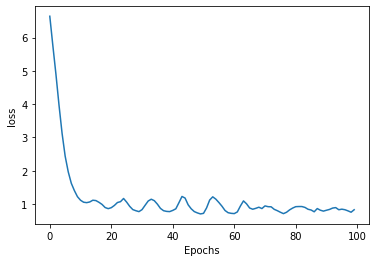

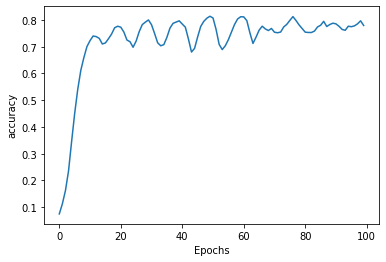

In [59]:
plot_graphs(history2, 'loss')
plot_graphs(history2, 'accuracy')

In [60]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this wink for her brothers and gathered them all all give and groups a call wink for her brothers and relations and wine a from big phelim mchugh mchugh there miss mchugh glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten he end odaly sure glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten glisten


## Character based model

In [61]:
ath_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1122304/1115394 [==============================] - 0s 0us/step


In [63]:
text = open(ath_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

Length of text: 1115394 characters


In [64]:
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [65]:
vocab = sorted(set(text))
print ('{} unique characters'.format(len(vocab)))

65 unique characters


### Vectorize the text

In [66]:
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text])

In [67]:
print('{')
for char,_ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '$' :   3,
  '&' :   4,
  "'" :   5,
  ',' :   6,
  '-' :   7,
  '.' :   8,
  '3' :   9,
  ':' :  10,
  ';' :  11,
  '?' :  12,
  'A' :  13,
  'B' :  14,
  'C' :  15,
  'D' :  16,
  'E' :  17,
  'F' :  18,
  'G' :  19,
  ...
}


In [68]:
print ('{} ---- characters mapped to int ---- > {}'.format(repr(text[:13]), text_as_int[:13]))

'First Citizen' ---- characters mapped to int ---- > [18 47 56 57 58  1 15 47 58 47 64 43 52]


In [69]:
# The maximum length sentence we want for a single input in characters
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
  print(idx2char[i.numpy()])

F
i
r
s
t


In [70]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(5):
  print(repr(''.join(idx2char[item.numpy()])))

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [71]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [72]:
for input_example, target_example in  dataset.take(1):
  print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))
  

Input data:  'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target data: 'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [73]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print("Step {:4d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

Step    0
  input: 18 ('F')
  expected output: 47 ('i')
Step    1
  input: 47 ('i')
  expected output: 56 ('r')
Step    2
  input: 56 ('r')
  expected output: 57 ('s')
Step    3
  input: 57 ('s')
  expected output: 58 ('t')
Step    4
  input: 58 ('t')
  expected output: 1 (' ')


In [74]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

In [75]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [76]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.GRU(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

In [77]:
model3 = build_model(
  vocab_size = len(vocab),
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)

In [78]:
for input_example_batch, target_example_batch in dataset.take(1):
  example_batch_predictions = model(input_example_batch)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 263) # (batch_size, sequence_length, vocab_size)


In [79]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (64, None, 256)           16640     
_________________________________________________________________
gru (GRU)                    (64, None, 1024)          3938304   
_________________________________________________________________
dense_7 (Dense)              (64, None, 65)            66625     
Total params: 4,021,569
Trainable params: 4,021,569
Non-trainable params: 0
_________________________________________________________________


In [80]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

InvalidArgumentError: ignored